# Análsis Planilla del Meduca
> Puntos a evaluar:
- Fecha de ingreso a la institución
- Salarios de los funcionarios
    - Detección de anomalías
    - Tendencia salarial en la institución
- Cédulas repetidas en la planilla

## Importar librerías y definir el DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path().resolve().parent / 'analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx'
DATA_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/data-portfolio/analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx')

In [2]:
meduca = pd.read_excel(DATA_PATH, skiprows=4)
meduca.head(2)

Nombre  Apellido         Cédula  \
0  AARON    ABREGO  8-0778-000967   
1  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   

                      Estado Fecha de inicio  
0  INTERINO HASTA FIN DE AÑO      26/04/2023  
1                 PERMANENTE      20/02/2019

In [3]:
meduca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombre           60000 non-null  object 
 1   Apellido         60000 non-null  object 
 2   Cédula           60000 non-null  object 
 3   Cargo            60000 non-null  object 
 4   Salario          60000 non-null  float64
 5   Gasto            60000 non-null  int64  
 6   Estado           60000 non-null  object 
 7   Fecha de inicio  60000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.7+ MB


## Análisis Fechas

In [4]:
meduca_fechas = meduca.copy()
meduca_fechas["Fecha de inicio"] = pd.to_datetime(meduca_fechas["Fecha de inicio"])
meduca_fechas.rename(columns={"Fecha de inicio" : "fecha"},inplace=True)
meduca_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Nombre    60000 non-null  object        
 1   Apellido  60000 non-null  object        
 2   Cédula    60000 non-null  object        
 3   Cargo     60000 non-null  object        
 4   Salario   60000 non-null  float64       
 5   Gasto     60000 non-null  int64         
 6   Estado    60000 non-null  object        
 7   fecha     60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_22927/141646501.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_fechas["Fecha de inicio"] = pd.to_datetime(meduca_fechas["Fecha de inicio"])


<Axes: >

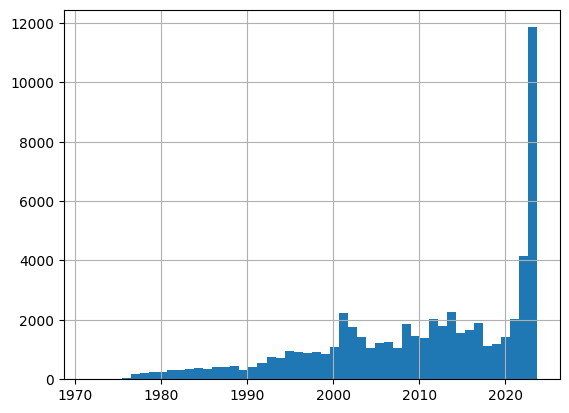

In [5]:
meduca_filtered = meduca_fechas[meduca_fechas["fecha"].dt.year >=1970]
meduca_filtered["fecha"].hist(bins=50)

<Axes: >

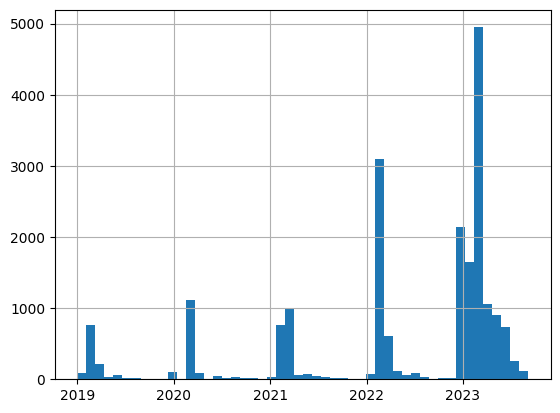

In [7]:
meduca_filtered = meduca_fechas[meduca_fechas["fecha"].dt.year >=2019]
meduca_filtered['fecha'].hist(bins=50)

In [7]:
meduca_2019 = len(meduca_fechas[meduca_fechas["fecha"].dt.year == 2019])
meduca_2020 = len(meduca_fechas[meduca_fechas["fecha"].dt.year == 2020])
meduca_2021 = len(meduca_fechas[meduca_fechas["fecha"].dt.year == 2021])
meduca_2022 = len(meduca_fechas[meduca_fechas["fecha"].dt.year == 2022])
meduca_2023 = len(meduca_fechas[meduca_fechas["fecha"].dt.year == 2023])

print(meduca_2019)
print(meduca_2020)
print(meduca_2021)
print(meduca_2022)
print(meduca_2023)

data = [[meduca_2019, 2019], [meduca_2020, 2020], [meduca_2021, 2021], [meduca_2022, 2022], [meduca_2023, 2023]]
df = pd.DataFrame(data, columns=['Cantidad', 'Year'])

df['Delta'] = df['Cantidad'].pct_change() * 100

df


1216
1464
2042
4116
11801


Cantidad  Year       Delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

posx and posy should be finite values
posx and posy should be finite values


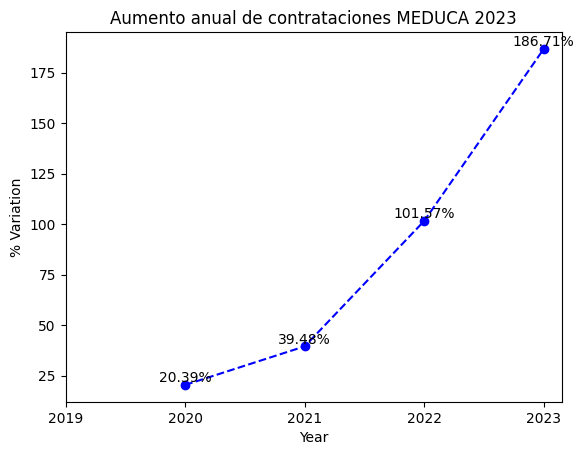

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set x-axis and y-axis data
x = df['Year']
y = df['Delta']

# Create the line chart with dots
plt.plot(x, y, marker='o', linestyle='--', color='blue')

# Add labels to the axes
plt.xlabel('Year')
plt.ylabel('% Variation')
plt.title('Aumento anual de contrataciones MEDUCA 2023')

# Set the x-axis ticks and labels
plt.xticks(x)

# Add value labels above each dot
for i, j in zip(x, y):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()


<Axes: ylabel='Estado'>

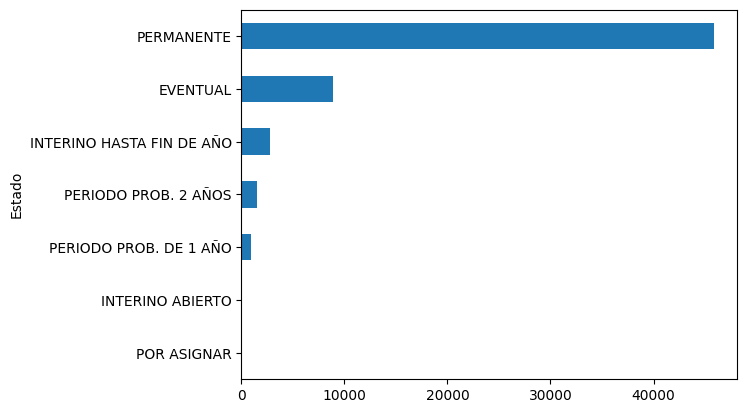

In [9]:
meduca.Estado.value_counts().sort_values().plot(kind='barh')

<Axes: title={'center': 'Salario'}, xlabel='Estado'>

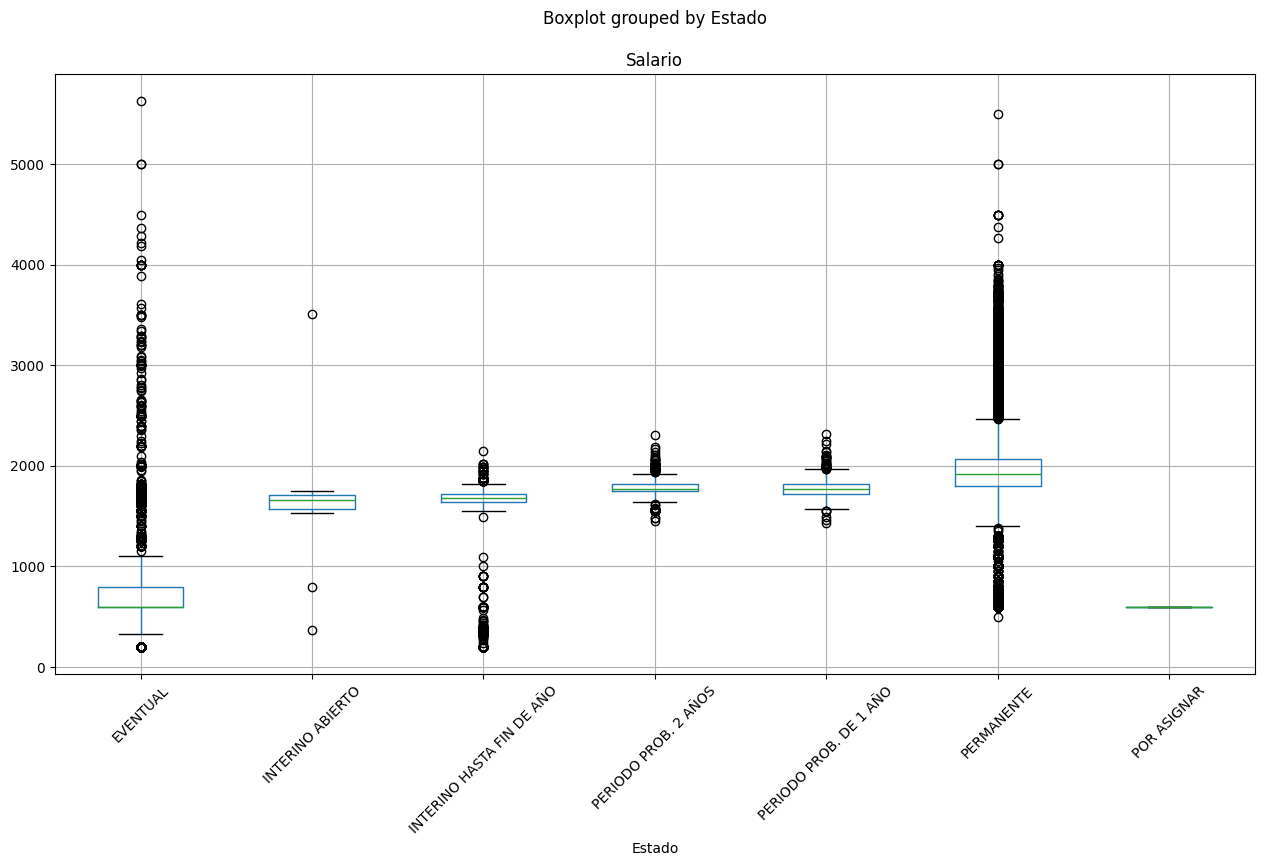

In [10]:
meduca.boxplot(column="Salario", by="Estado", figsize=(15,8), rot=45)

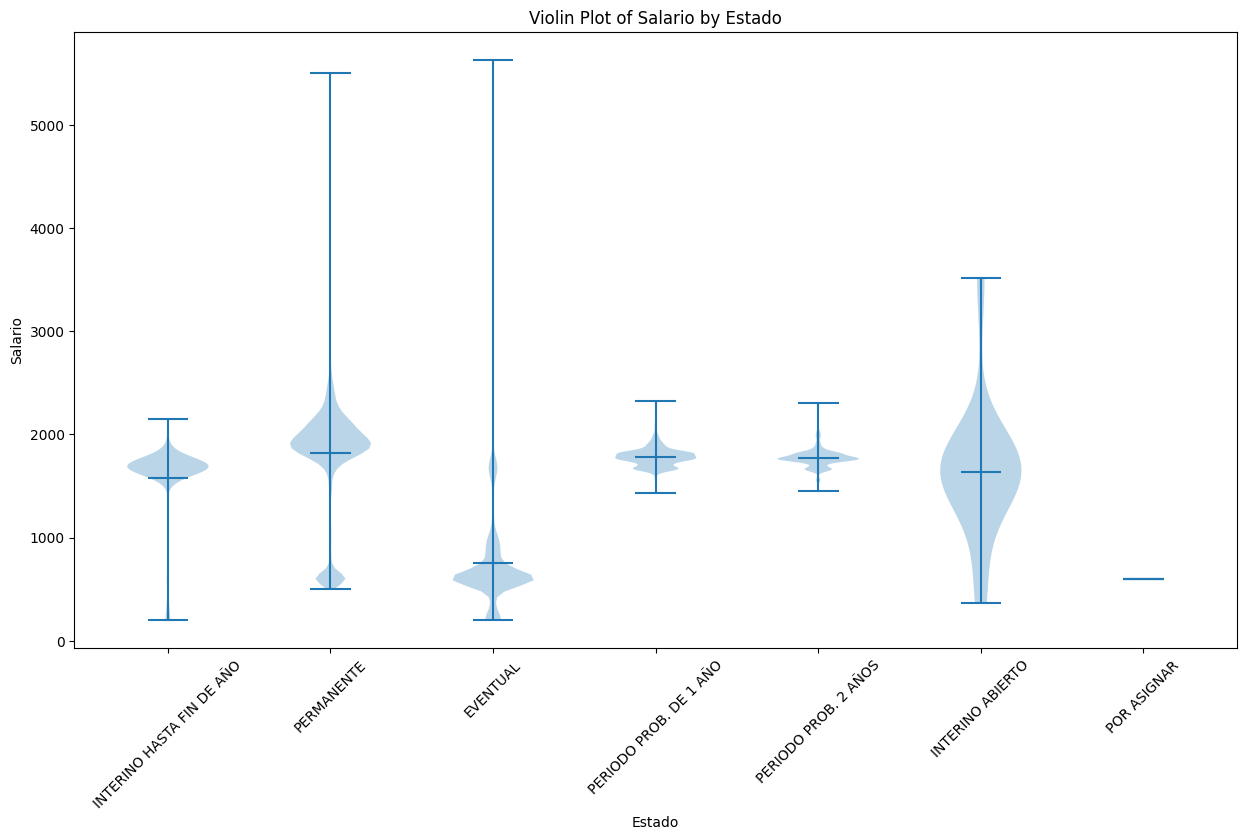

In [11]:
import matplotlib.pyplot as plt

# Assuming 'meduca' is your dataframe and 'Salario' and 'Estado' are the column names
plt.figure(figsize=(15, 8))
plt.violinplot(dataset=[meduca[meduca['Estado'] == estado]['Salario'] for estado in meduca['Estado'].unique()],
               showmeans=True)
plt.xticks(ticks=range(1, len(meduca['Estado'].unique()) + 1),
           labels=meduca['Estado'].unique(), rotation=45)
plt.xlabel('Estado')
plt.ylabel('Salario')
plt.title('Violin Plot of Salario by Estado')
plt.show()


In [17]:
meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size()

fecha
2019     1216
2020     1464
2021     2042
2022     4116
2023    11801
dtype: int64

In [18]:
salario_sum = meduca_filtered.groupby(meduca_filtered['fecha'].dt.year)['Salario'].sum()
salario_sum

fecha
2019     2192419.33
2020     2449717.63
2021     3426856.95
2022     4940344.85
2023    12282154.03
Name: Salario, dtype: float64

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Sample data
categories = meduca_filtered['fecha'].dt.year.unique()
categories = sorted(categories,reverse=False)  # Sort the unique years in ascending order
date_counts = meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size()
money_amounts = meduca_filtered.groupby(meduca_filtered['fecha'].dt.year)['Salario'].sum()
line_data = money_amounts  # Use the 'money_amounts' as line chart data

# Set the locale to format currency
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart on the primary y-axis
bars = ax.bar(categories, date_counts, color='blue', alpha=0.5, label='Nuevos Funcionarios')

# Set labels and title for the primary y-axis
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Ingreso de Funcionarios')

# Create a twin axis sharing the x-axis with the primary axis
ax2 = ax.twinx()

# Plot the line chart for the sum of 'Salario' on the secondary y-axis
line = ax2.plot(categories, line_data, marker='o', linestyle='-', color='red', label='Salario Mensual de los Nuevos Ingresos')

# Format the y-axis of the line chart as currency
ax2.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

# Set labels and title for the secondary y-axis
ax2.set_ylabel('Money Amount (USD)')

# Adding a legend
# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# Add total amount of occurrences on top of the bars
for bar, count in zip(bars, date_counts):
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Add total money value on top of the markers
for i, amount in enumerate(line_data):
    ax2.text(categories[i], amount, locale.format_string('$%.2f', amount, grouping=True), ha='center', va='bottom', fontsize=10)

# Show the plot

plt.title('Data Occurrences and Money Amount by Year')
fig.tight_layout()  # Ensures the labels fit within the plot area
plt.show()
